In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [4]:
df.isna().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [5]:
df.drop(['body',"cabin","name",'embarked','home.dest'],axis=1,inplace=True)

In [6]:
df.isna().sum()

pclass        0
survived      0
sex           0
age         263
sibsp         0
parch         0
ticket        0
fare          1
boat        823
dtype: int64

In [7]:
df.drop(['boat',"age"],axis=1,inplace=True)

In [8]:
df.isna().sum()

pclass      0
survived    0
sex         0
sibsp       0
parch       0
ticket      0
fare        1
dtype: int64

In [9]:
df['fare'].fillna(df['fare'].mean(),inplace=True)
df.isna().sum()

pclass      0
survived    0
sex         0
sibsp       0
parch       0
ticket      0
fare        0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   sex       1309 non-null   object 
 3   sibsp     1309 non-null   int64  
 4   parch     1309 non-null   int64  
 5   ticket    1309 non-null   object 
 6   fare      1309 non-null   float64
dtypes: float64(1), int64(4), object(2)
memory usage: 71.7+ KB


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df['ticket'] = le.fit_transform(df['ticket'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   sex       1309 non-null   int64  
 3   sibsp     1309 non-null   int64  
 4   parch     1309 non-null   int64  
 5   ticket    1309 non-null   int64  
 6   fare      1309 non-null   float64
dtypes: float64(1), int64(6)
memory usage: 71.7 KB


In [13]:
df

,pclass,survived,sex,sibsp,parch,ticket,fare
0,1,1,0,0,0,187,211.3375
1,1,1,1,1,2,49,151.5500
2,1,0,0,1,2,49,151.5500
3,1,0,1,1,2,49,151.5500
4,1,0,0,1,2,49,151.5500
...,...,...,...,...,...,...,...
1304,3,0,0,1,0,259,14.4542
1305,3,0,0,1,0,259,14.4542
1306,3,0,1,0,0,250,7.2250
1307,3,0,1,0,0,264,7.2250


In [14]:
df.corr()

,pclass,survived,sex,sibsp,parch,ticket,fare
pclass,1.000000,-0.312469,0.124617,0.060832,0.018322,0.309695,-0.558477
survived,-0.312469,1.000000,-0.528693,-0.027825,0.082660,-0.125869,0.244208
sex,0.124617,-0.528693,1.000000,-0.109609,-0.213125,0.024725,-0.185484
sibsp,0.060832,-0.027825,-0.109609,1.000000,0.373587,0.063921,0.160224
parch,0.018322,0.082660,-0.213125,0.373587,1.000000,0.053389,0.221522
ticket,0.309695,-0.125869,0.024725,0.063921,0.053389,1.000000,-0.014735
fare,-0.558477,0.244208,-0.185484,0.160224,0.221522,-0.014735,1.000000


In [15]:
df.drop(['sibsp','parch','ticket'],axis=1,inplace=True)

In [16]:
df

,pclass,survived,sex,fare
0,1,1,0,211.3375
1,1,1,1,151.5500
2,1,0,0,151.5500
3,1,0,1,151.5500
4,1,0,0,151.5500
...,...,...,...,...
1304,3,0,0,14.4542
1305,3,0,0,14.4542
1306,3,0,1,7.2250
1307,3,0,1,7.2250


In [17]:
x = df.drop('survived',axis=1)
y = df['survived']

In [114]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=2)

In [115]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
x_train = mms.fit_transform(x_train)
x_test = mms.fit_transform(x_test)

In [116]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=5,n_estimators=20)
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=20)

In [117]:
y_pred = model.predict(x_test)
y_true = y_test

accuracy = 0.8320610687022901
f1 = 0.7142857142857143


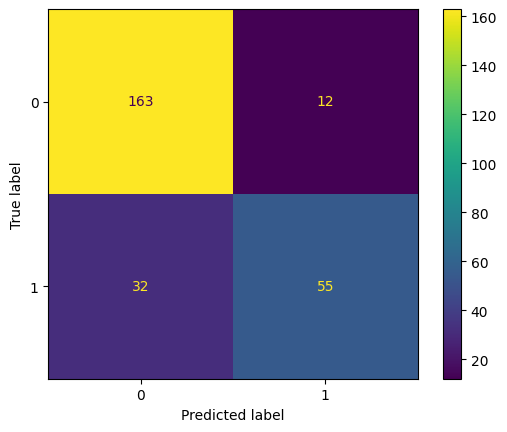

In [118]:
from sklearn.metrics import accuracy_score,f1_score
accuracy = accuracy_score(y_true,y_pred)
f1 = f1_score(y_true,y_pred)
print(f'accuracy = {accuracy}')
print(f"f1 = {f1}")
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_true,y_pred)
display = ConfusionMatrixDisplay(cm)
display.plot()
plt.show()

In [107]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

accuracy = 0.7862595419847328
f1 = 0.7083333333333334


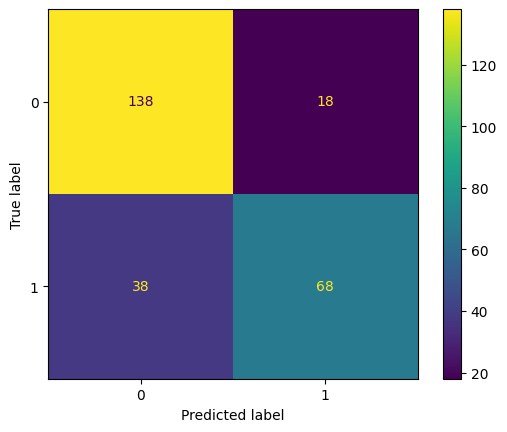

In [108]:
y_pred = model.predict(x_test)
y_true = y_test
from sklearn.metrics import accuracy_score,f1_score
accuracy = accuracy_score(y_true,y_pred)
f1 = f1_score(y_true,y_pred)
print(f'accuracy = {accuracy}')
print(f"f1 = {f1}")
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_true,y_pred)
display = ConfusionMatrixDisplay(cm)
display.plot()
plt.show()

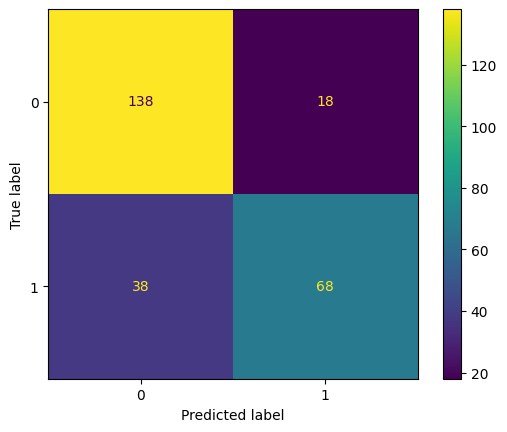

0.7862595419847328

In [105]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=1)
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
x_train = mms.fit_transform(x_train)
x_test = mms.fit_transform(x_test)
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_true = y_test
from sklearn.metrics import accuracy_score,f1_score
accuracy = accuracy_score(y_true,y_pred)
accuracy
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_true,y_pred)
display = ConfusionMatrixDisplay(cm)
display.plot()
plt.show()
accuracy

In [101]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=1)
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
x_train = mms.fit_transform(x_train)
x_test = mms.fit_transform(x_test)
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=10)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_true = y_test
from sklearn.metrics import accuracy_score,f1_score
accuracy = accuracy_score(y_true,y_pred)
accuracy

0.7977099236641222

In [102]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=2)
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
x_train = mms.fit_transform(x_train)
x_test = mms.fit_transform(x_test)
from sklearn.linear_model import LogisticRegressionCV
model = LogisticRegressionCV()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_true = y_test
from sklearn.metrics import accuracy_score,f1_score
accuracy = accuracy_score(y_true,y_pred)
accuracy

0.8206106870229007

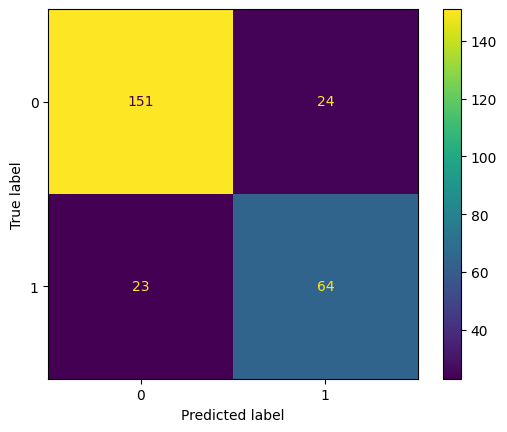

In [103]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_true,y_pred)
display = ConfusionMatrixDisplay(cm)
display.plot()
plt.show()

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   sex       1309 non-null   int64  
 3   fare      1309 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 41.0 KB


In [56]:
df['survived'].count()

1309

In [57]:
df['survived'].unique()

array([1, 0])

In [74]:
ns = 0
sur = 0
for i in df['survived']:
    if i == 1:
        sur = sur + 1
    else:
        ns = ns + 1
print(sur,ns)

500 809


In [92]:
df['survived'].value_counts()

0    809
1    500
Name: survived, dtype: int64